In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_excel('Data_Train.xlsx')

In [3]:
data.head(8)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270


In [4]:
data.shape

(10683, 11)

In [5]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
data.dropna(inplace=True)

In [8]:
data.shape

(10682, 11)

In [9]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


In [17]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [21]:
def change_to_date(column):
    data[column]=pd.to_datetime(data[column],infer_datetime_format=True)

In [23]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [25]:
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_to_date(i)

In [27]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-12-30 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-12-30 05:50:00,2024-12-30 13:15:00,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-12-30 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2024-12-30 18:05:00,2024-12-30 23:30:00,5h 25m,1 stop,No info,6218
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2024-12-30 16:50:00,2024-12-30 21:35:00,4h 45m,1 stop,No info,13302


In [29]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [31]:
data['Journey_date']=data['Date_of_Journey'].dt.day
data['Journey_month']=data['Date_of_Journey'].dt.month

In [33]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-12-30 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-12-30 05:50:00,2024-12-30 13:15:00,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-12-30 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2024-12-30 18:05:00,2024-12-30 23:30:00,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2024-12-30 16:50:00,2024-12-30 21:35:00,4h 45m,1 stop,No info,13302,1,3


In [35]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
Journey_date                int32
Journey_month               int32
dtype: object

In [37]:
data['Arr_hour']=data['Arrival_Time'].dt.hour
data['Arr_min']=data['Arrival_Time'].dt.minute

In [39]:
def getting_hr(df,column):
    df[column+'_hour']=df[column].dt.hour
def getting_min(df,column):
    df[column+'_min']=df[column].dt.minute
def drop_column(df,column):
    df.drop(column,axis=1,inplace=True)

In [41]:
getting_hr(data,'Arrival_Time')
getting_min(data,'Arrival_Time')
getting_hr(data,'Dep_Time')
getting_min(data,'Dep_Time')

In [43]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Arr_hour,Arr_min,Arrival_Time_hour,Arrival_Time_min,Dep_Time_hour,Dep_Time_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-12-30 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,1,10,1,10,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-12-30 05:50:00,2024-12-30 13:15:00,7h 25m,2 stops,No info,7662,1,5,13,15,13,15,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-12-30 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6,4,25,4,25,9,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2024-12-30 18:05:00,2024-12-30 23:30:00,5h 25m,1 stop,No info,6218,12,5,23,30,23,30,18,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2024-12-30 16:50:00,2024-12-30 21:35:00,4h 45m,1 stop,No info,13302,1,3,21,35,21,35,16,50


In [45]:
data.dtypes

Airline                      object
Date_of_Journey      datetime64[ns]
Source                       object
Destination                  object
Route                        object
Dep_Time             datetime64[ns]
Arrival_Time         datetime64[ns]
Duration                     object
Total_Stops                  object
Additional_Info              object
Price                         int64
Journey_date                  int32
Journey_month                 int32
Arr_hour                      int32
Arr_min                       int32
Arrival_Time_hour             int32
Arrival_Time_min              int32
Dep_Time_hour                 int32
Dep_Time_min                  int32
dtype: object

In [47]:
duration=list(data['Duration'])

In [49]:
duration

['2h 50m',
 '7h 25m',
 '19h',
 '5h 25m',
 '4h 45m',
 '2h 25m',
 '15h 30m',
 '21h 5m',
 '25h 30m',
 '7h 50m',
 '13h 15m',
 '2h 35m',
 '2h 15m',
 '12h 10m',
 '2h 35m',
 '26h 35m',
 '4h 30m',
 '22h 35m',
 '23h',
 '20h 35m',
 '5h 10m',
 '15h 20m',
 '2h 50m',
 '2h 55m',
 '13h 20m',
 '15h 10m',
 '5h 45m',
 '5h 55m',
 '2h 50m',
 '2h 15m',
 '2h 15m',
 '13h 25m',
 '2h 50m',
 '22h',
 '5h 30m',
 '10h 25m',
 '5h 15m',
 '2h 30m',
 '6h 15m',
 '11h 55m',
 '11h 5m',
 '8h 30m',
 '22h 5m',
 '2h 45m',
 '12h',
 '2h 50m',
 '2h 50m',
 '2h 15m',
 '16h 5m',
 '19h 55m',
 '3h 15m',
 '25h 20m',
 '2h 50m',
 '3h',
 '2h 50m',
 '16h 15m',
 '15h 5m',
 '2h 15m',
 '6h 30m',
 '25h 5m',
 '12h 25m',
 '27h 20m',
 '10h 15m',
 '10h 30m',
 '2h 15m',
 '10h 25m',
 '2h 50m',
 '1h 30m',
 '13h 20m',
 '2h 15m',
 '1h 25m',
 '26h 30m',
 '7h 20m',
 '13h 30m',
 '5h',
 '2h 45m',
 '2h 50m',
 '1h 30m',
 '19h 5m',
 '2h 15m',
 '14h 50m',
 '2h 40m',
 '22h 10m',
 '9h 35m',
 '10h',
 '21h 20m',
 '5h 25m',
 '18h 45m',
 '12h 20m',
 '18h',
 '9h 15

In [51]:
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:
            duration[i]=duration[i]+' 0m'
        else:
            duration[i]='0h '+ duration[i]

In [53]:
duration

['2h 50m',
 '7h 25m',
 '19h 0m',
 '5h 25m',
 '4h 45m',
 '2h 25m',
 '15h 30m',
 '21h 5m',
 '25h 30m',
 '7h 50m',
 '13h 15m',
 '2h 35m',
 '2h 15m',
 '12h 10m',
 '2h 35m',
 '26h 35m',
 '4h 30m',
 '22h 35m',
 '23h 0m',
 '20h 35m',
 '5h 10m',
 '15h 20m',
 '2h 50m',
 '2h 55m',
 '13h 20m',
 '15h 10m',
 '5h 45m',
 '5h 55m',
 '2h 50m',
 '2h 15m',
 '2h 15m',
 '13h 25m',
 '2h 50m',
 '22h 0m',
 '5h 30m',
 '10h 25m',
 '5h 15m',
 '2h 30m',
 '6h 15m',
 '11h 55m',
 '11h 5m',
 '8h 30m',
 '22h 5m',
 '2h 45m',
 '12h 0m',
 '2h 50m',
 '2h 50m',
 '2h 15m',
 '16h 5m',
 '19h 55m',
 '3h 15m',
 '25h 20m',
 '2h 50m',
 '3h 0m',
 '2h 50m',
 '16h 15m',
 '15h 5m',
 '2h 15m',
 '6h 30m',
 '25h 5m',
 '12h 25m',
 '27h 20m',
 '10h 15m',
 '10h 30m',
 '2h 15m',
 '10h 25m',
 '2h 50m',
 '1h 30m',
 '13h 20m',
 '2h 15m',
 '1h 25m',
 '26h 30m',
 '7h 20m',
 '13h 30m',
 '5h 0m',
 '2h 45m',
 '2h 50m',
 '1h 30m',
 '19h 5m',
 '2h 15m',
 '14h 50m',
 '2h 40m',
 '22h 10m',
 '9h 35m',
 '10h 0m',
 '21h 20m',
 '5h 25m',
 '18h 45m',
 '12h 

In [55]:
data['Duration']=duration

In [57]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Arr_hour,Arr_min,Arrival_Time_hour,Arrival_Time_min,Dep_Time_hour,Dep_Time_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-12-30 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,1,10,1,10,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-12-30 05:50:00,2024-12-30 13:15:00,7h 25m,2 stops,No info,7662,1,5,13,15,13,15,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-12-30 09:25:00,2024-06-10 04:25:00,19h 0m,2 stops,No info,13882,9,6,4,25,4,25,9,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2024-12-30 18:05:00,2024-12-30 23:30:00,5h 25m,1 stop,No info,6218,12,5,23,30,23,30,18,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2024-12-30 16:50:00,2024-12-30 21:35:00,4h 45m,1 stop,No info,13302,1,3,21,35,21,35,16,50


In [59]:
a = '12h 20m'

In [61]:
a.split(' ')

['12h', '20m']

In [63]:
int (a.split(' ')[0][:-1])

12

In [65]:
h = int (a.split(' ')[0][:-1])

In [67]:
h

12

In [69]:
def hour(i):
    return i.split(' ')[0][0:-1]
def minute(i):
    return i.split(' ')[1][0:-1]
    

In [71]:
data['Duration_hr']=data['Duration'].apply(hour)

In [73]:
data['Duration_min']=data['Duration'].apply(minute)

In [75]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Journey_date,Journey_month,Arr_hour,Arr_min,Arrival_Time_hour,Arrival_Time_min,Dep_Time_hour,Dep_Time_min,Duration_hr,Duration_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-12-30 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,...,24,3,1,10,1,10,22,20,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-12-30 05:50:00,2024-12-30 13:15:00,7h 25m,2 stops,No info,...,1,5,13,15,13,15,5,50,7,25
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-12-30 09:25:00,2024-06-10 04:25:00,19h 0m,2 stops,No info,...,9,6,4,25,4,25,9,25,19,0
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2024-12-30 18:05:00,2024-12-30 23:30:00,5h 25m,1 stop,No info,...,12,5,23,30,23,30,18,5,5,25
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2024-12-30 16:50:00,2024-12-30 21:35:00,4h 45m,1 stop,No info,...,1,3,21,35,21,35,16,50,4,45


In [77]:
data.dtypes

Airline                      object
Date_of_Journey      datetime64[ns]
Source                       object
Destination                  object
Route                        object
Dep_Time             datetime64[ns]
Arrival_Time         datetime64[ns]
Duration                     object
Total_Stops                  object
Additional_Info              object
Price                         int64
Journey_date                  int32
Journey_month                 int32
Arr_hour                      int32
Arr_min                       int32
Arrival_Time_hour             int32
Arrival_Time_min              int32
Dep_Time_hour                 int32
Dep_Time_min                  int32
Duration_hr                  object
Duration_min                 object
dtype: object

In [79]:
data['Duration_hr']=data['Duration_hr'].astype(int)
data['Duration_min']=data['Duration_min'].astype(int)


In [81]:
data.dtypes

Airline                      object
Date_of_Journey      datetime64[ns]
Source                       object
Destination                  object
Route                        object
Dep_Time             datetime64[ns]
Arrival_Time         datetime64[ns]
Duration                     object
Total_Stops                  object
Additional_Info              object
Price                         int64
Journey_date                  int32
Journey_month                 int32
Arr_hour                      int32
Arr_min                       int32
Arrival_Time_hour             int32
Arrival_Time_min              int32
Dep_Time_hour                 int32
Dep_Time_min                  int32
Duration_hr                   int32
Duration_min                  int32
dtype: object

In [83]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_date', 'Journey_month', 'Arr_hour',
       'Arr_min', 'Arrival_Time_hour', 'Arrival_Time_min', 'Dep_Time_hour',
       'Dep_Time_min', 'Duration_hr', 'Duration_min'],
      dtype='object')

In [85]:
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time', 'Duration']:
    drop_column(data,i)

In [87]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Arr_hour,Arr_min,Arrival_Time_hour,Arrival_Time_min,Dep_Time_hour,Dep_Time_min,Duration_hr,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,1,10,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,13,15,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,4,25,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,23,30,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,21,35,21,35,16,50,4,45


In [89]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [91]:
dict_a={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [93]:
data['Total_Stops']=data['Total_Stops'].map(dict_a)

In [95]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Arr_hour,Arr_min,Arrival_Time_hour,Arrival_Time_min,Dep_Time_hour,Dep_Time_min,Duration_hr,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,1,10,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,1,5,13,15,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,9,6,4,25,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,12,5,23,30,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,1,3,21,35,21,35,16,50,4,45


In [97]:
data.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops           int64
Additional_Info      object
Price                 int64
Journey_date          int32
Journey_month         int32
Arr_hour              int32
Arr_min               int32
Arrival_Time_hour     int32
Arrival_Time_min      int32
Dep_Time_hour         int32
Dep_Time_min          int32
Duration_hr           int32
Duration_min          int32
dtype: object

In [99]:
len(data['Airline'].unique())

12

In [101]:
cat_data=[columns for columns in data.columns if data[columns].dtype=='O']

In [103]:
cat_data

['Airline', 'Source', 'Destination', 'Route', 'Additional_Info']

In [105]:
cont_data=[columns for columns in data.columns if data[columns].dtype!='O']

In [ ]:
cont_data

In [109]:
cat_data=data[cat_data]

In [111]:
cat_data.head()

,Airline,Source,Destination,Route,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,No info


In [113]:
cont_data=data[cont_data]

In [115]:
cont_data.head()

,Total_Stops,Price,Journey_date,Journey_month,Arr_hour,Arr_min,Arrival_Time_hour,Arrival_Time_min,Dep_Time_hour,Dep_Time_min,Duration_hr,Duration_min
0,0,3897,24,3,1,10,1,10,22,20,2,50
1,2,7662,1,5,13,15,13,15,5,50,7,25
2,2,13882,9,6,4,25,4,25,9,25,19,0
3,1,6218,12,5,23,30,23,30,18,5,5,25
4,1,13302,1,3,21,35,21,35,16,50,4,45


In [117]:
cat_data['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

<Axes: xlabel='Airline', ylabel='Price'>

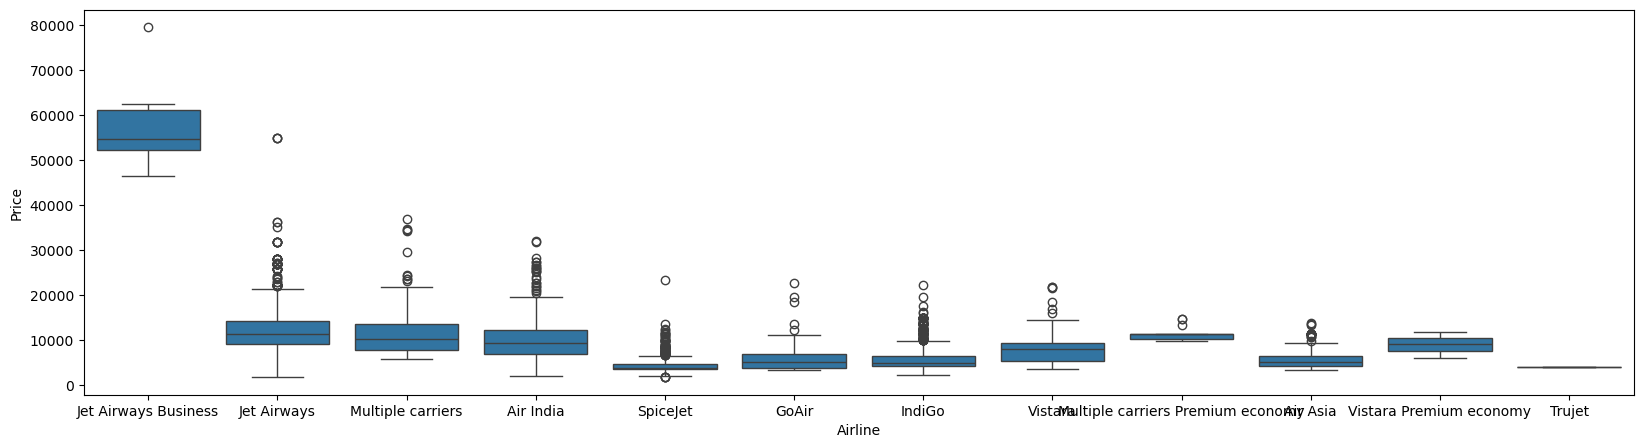

In [121]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_date', 'Journey_month', 'Arr_hour',
       'Arr_min', 'Arrival_Time_hour', 'Arrival_Time_min', 'Dep_Time_hour',
       'Dep_Time_min', 'Duration_hr', 'Duration_min'],
      dtype='object')

<Axes: xlabel='Total_Stops', ylabel='Price'>

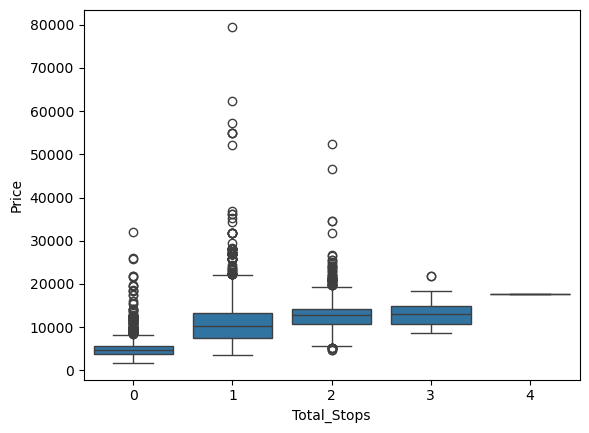

In [123]:
sns.boxplot(x='Total_Stops',y='Price',data=data.sort_values('Price',ascending=False))

In [125]:
data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [127]:
Airline=pd.get_dummies(cat_data['Airline'],dtype=int)

In [129]:
data[['Airline']]

,Airline
0,IndiGo
1,Air India
2,Jet Airways
3,IndiGo
4,IndiGo
...,...
10678,Air Asia
10679,Air India
10680,Jet Airways
10681,Vistara


In [131]:
Airline.head()

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0


In [133]:
cat_data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Additional_Info'], dtype='object')

In [135]:
Source=pd.get_dummies(cat_data['Source'],dtype=int)

In [137]:
Source.head()

,Banglore,Chennai,Delhi,Kolkata,Mumbai
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,1,0,0,0,0


In [147]:
Destination=pd.get_dummies(cat_data['Destination'],dtype=int)

In [149]:
Destination.head(3)

,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,0,1
1,1,0,0,0,0,0
2,0,1,0,0,0,0


In [151]:
cat_data.head()

,Airline,Source,Destination,Route,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,No info


In [153]:
cat_data['route_1']=cat_data['Route'].str.split('→').str[0]

In [155]:
cat_data.head()

,Airline,Source,Destination,Route,Additional_Info,route_1
0,IndiGo,Banglore,New Delhi,BLR → DEL,No info,BLR
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,No info,CCU
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,No info,DEL
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,No info,CCU
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,No info,BLR


In [157]:
cat_data['Route'].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [159]:
cat_data['route_2']=cat_data['Route'].str.split('→').str[1]
cat_data['route_3']=cat_data['Route'].str.split('→').str[2]
cat_data['route_4']=cat_data['Route'].str.split('→').str[3]
cat_data['route_5']=cat_data['Route'].str.split('→').str[4]
cat_data['route_6']=cat_data['Route'].str.split('→').str[5]

In [161]:
cat_data

,Airline,Source,Destination,Route,Additional_Info,route_1,route_2,route_3,route_4,route_5,route_6
0,IndiGo,Banglore,New Delhi,BLR → DEL,No info,BLR,DEL,NaN,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,No info,CCU,IXR,BBI,BLR,NaN,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,No info,DEL,LKO,BOM,COK,NaN,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,No info,CCU,NAG,BLR,NaN,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,No info,BLR,NAG,DEL,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,No info,CCU,BLR,NaN,NaN,NaN,NaN
10679,Air India,Kolkata,Banglore,CCU → BLR,No info,CCU,BLR,NaN,NaN,NaN,NaN
10680,Jet Airways,Banglore,Delhi,BLR → DEL,No info,BLR,DEL,NaN,NaN,NaN,NaN
10681,Vistara,Banglore,New Delhi,BLR → DEL,No info,BLR,DEL,NaN,NaN,NaN,NaN


In [163]:
data.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops           int64
Additional_Info      object
Price                 int64
Journey_date          int32
Journey_month         int32
Arr_hour              int32
Arr_min               int32
Arrival_Time_hour     int32
Arrival_Time_min      int32
Dep_Time_hour         int32
Dep_Time_min          int32
Duration_hr           int32
Duration_min          int32
dtype: object

In [165]:
cat_data.isnull().sum()

Airline                0
Source                 0
Destination            0
Route                  0
Additional_Info        0
route_1                0
route_2                0
route_3             3491
route_4             9116
route_5            10636
route_6            10681
dtype: int64

In [167]:
cat_data.shape

(10682, 11)

In [169]:
for i in ['Route','Additional_Info']:
    drop_column(cat_data,i)

In [171]:
data['Additional_Info'].value_counts()

Additional_Info
No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [173]:
cat_data.head()

,Airline,Source,Destination,route_1,route_2,route_3,route_4,route_5,route_6
0,IndiGo,Banglore,New Delhi,BLR,DEL,NaN,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU,IXR,BBI,BLR,NaN,NaN
2,Jet Airways,Delhi,Cochin,DEL,LKO,BOM,COK,NaN,NaN
3,IndiGo,Kolkata,Banglore,CCU,NAG,BLR,NaN,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR,NAG,DEL,NaN,NaN,NaN


In [175]:
cat_data.isnull().sum()

Airline            0
Source             0
Destination        0
route_1            0
route_2            0
route_3         3491
route_4         9116
route_5        10636
route_6        10681
dtype: int64

In [177]:
cat_data.columns

Index(['Airline', 'Source', 'Destination', 'route_1', 'route_2', 'route_3',
       'route_4', 'route_5', 'route_6'],
      dtype='object')

In [179]:
for i in ['route_3','route_4', 'route_5', 'route_6']:
    cat_data[i].fillna('None',inplace=True)

In [181]:
cat_data.head()

,Airline,Source,Destination,route_1,route_2,route_3,route_4,route_5,route_6
0,IndiGo,Banglore,New Delhi,BLR,DEL,None,None,None,None
1,Air India,Kolkata,Banglore,CCU,IXR,BBI,BLR,None,None
2,Jet Airways,Delhi,Cochin,DEL,LKO,BOM,COK,None,None
3,IndiGo,Kolkata,Banglore,CCU,NAG,BLR,None,None,None
4,IndiGo,Banglore,New Delhi,BLR,NAG,DEL,None,None,None


In [183]:
drop_column(cat_data,'route_6')

In [185]:
cat_data.head()

,Airline,Source,Destination,route_1,route_2,route_3,route_4,route_5
0,IndiGo,Banglore,New Delhi,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,BLR,NAG,DEL,None,None


In [187]:
from sklearn.preprocessing import LabelEncoder

In [189]:
encoder=LabelEncoder()

In [191]:
cat_data.columns

Index(['Airline', 'Source', 'Destination', 'route_1', 'route_2', 'route_3',
       'route_4', 'route_5'],
      dtype='object')

In [193]:
for i in ['route_1', 'route_2', 'route_3','route_4', 'route_5']:
    cat_data[i]=encoder.fit_transform(cat_data[i])

In [195]:
cat_data.head()

,Airline,Source,Destination,route_1,route_2,route_3,route_4,route_5
0,IndiGo,Banglore,New Delhi,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,0,34,8,13,5


In [197]:
cat_data['route_3'].unique()

array([29,  1,  4,  3,  8,  6,  9,  0, 13, 21, 22,  7, 11, 23, 10,  2, 19,
       15, 17, 14, 27, 24, 20, 25, 12, 16,  5, 26, 28, 18])

In [199]:
new_data=pd.concat([cat_data,Source,Airline,Destination,cont_data],axis=1)

In [201]:
new_data.head()

,Airline,Source,Destination,route_1,route_2,route_3,route_4,route_5,Banglore,Chennai,...,Journey_date,Journey_month,Arr_hour,Arr_min,Arrival_Time_hour,Arrival_Time_min,Dep_Time_hour,Dep_Time_min,Duration_hr,Duration_min
0,IndiGo,Banglore,New Delhi,0,13,29,13,5,1,0,...,24,3,1,10,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,2,25,1,3,5,0,0,...,1,5,13,15,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,3,32,4,5,5,0,0,...,9,6,4,25,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,2,34,3,13,5,0,0,...,12,5,23,30,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,0,34,8,13,5,1,0,...,1,3,21,35,21,35,16,50,4,45


In [203]:
pd.options.display.max_columns=40

In [205]:
new_data.head()

,Airline,Source,Destination,route_1,route_2,route_3,route_4,route_5,Banglore,Chennai,Delhi,Kolkata,Mumbai,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,...,Vistara,Vistara Premium economy,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Total_Stops,Price,Journey_date,Journey_month,Arr_hour,Arr_min,Arrival_Time_hour,Arrival_Time_min,Dep_Time_hour,Dep_Time_min,Duration_hr,Duration_min
0,IndiGo,Banglore,New Delhi,0,13,29,13,5,1,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,3897,24,3,1,10,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,2,25,1,3,5,0,0,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,2,7662,1,5,13,15,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,3,32,4,5,5,0,0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,2,13882,9,6,4,25,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,2,34,3,13,5,0,0,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,6218,12,5,23,30,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,0,34,8,13,5,1,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,13302,1,3,21,35,21,35,16,50,4,45


In [207]:
for i in ['Airline','Source','Destination']:
    drop_column(new_data,i)

In [209]:
new_data.head()

,route_1,route_2,route_3,route_4,route_5,Banglore,Chennai,Delhi,Kolkata,Mumbai,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Total_Stops,Price,Journey_date,Journey_month,Arr_hour,Arr_min,Arrival_Time_hour,Arrival_Time_min,Dep_Time_hour,Dep_Time_min,Duration_hr,Duration_min
0,0,13,29,13,5,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3897,24,3,1,10,1,10,22,20,2,50
1,2,25,1,3,5,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,7662,1,5,13,15,13,15,5,50,7,25
2,3,32,4,5,5,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,2,13882,9,6,4,25,4,25,9,25,19,0
3,2,34,3,13,5,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,6218,12,5,23,30,23,30,18,5,5,25
4,0,34,8,13,5,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,13302,1,3,21,35,21,35,16,50,4,45


In [211]:
new_data.dtypes

route_1                              int32
route_2                              int32
route_3                              int32
route_4                              int32
route_5                              int32
Banglore                             int32
Chennai                              int32
Delhi                                int32
Kolkata                              int32
Mumbai                               int32
Air Asia                             int32
Air India                            int32
GoAir                                int32
IndiGo                               int32
Jet Airways                          int32
Jet Airways Business                 int32
Multiple carriers                    int32
Multiple carriers Premium economy    int32
SpiceJet                             int32
Trujet                               int32
Vistara                              int32
Vistara Premium economy              int32
Banglore                             int32
Cochin     

In [213]:
def plotting(df,column):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.histplot(df[column],ax=ax1)
    sns.boxplot(df[column],ax=ax2)

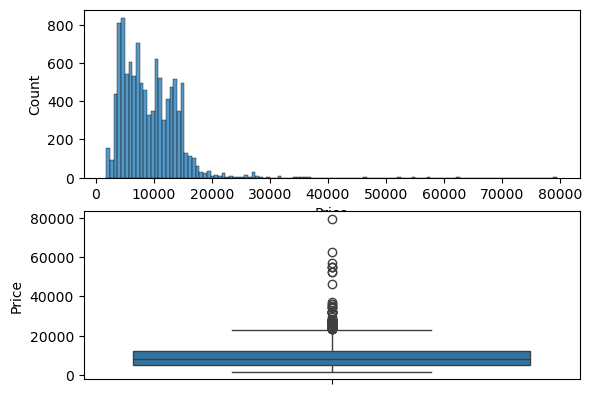

In [215]:
plotting(new_data,'Price')

In [217]:
new_data['Price']=np.where(new_data['Price']>=40000,new_data['Price'].median(),new_data['Price'])

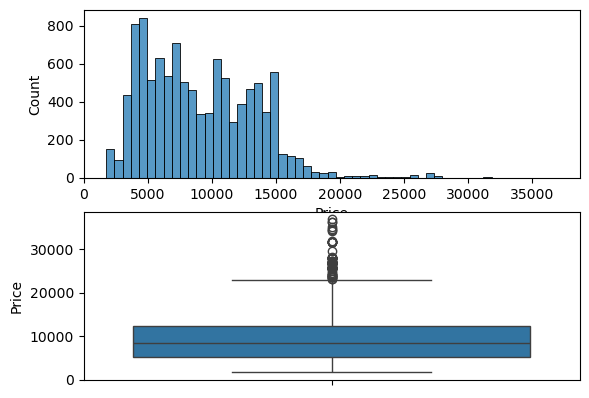

In [219]:
plotting(new_data,'Price')

In [221]:
y=new_data['Price']

In [223]:
X=new_data.drop('Price',axis=1)

In [225]:
X.head()

,route_1,route_2,route_3,route_4,route_5,Banglore,Chennai,Delhi,Kolkata,Mumbai,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Total_Stops,Journey_date,Journey_month,Arr_hour,Arr_min,Arrival_Time_hour,Arrival_Time_min,Dep_Time_hour,Dep_Time_min,Duration_hr,Duration_min
0,0,13,29,13,5,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,24,3,1,10,1,10,22,20,2,50
1,2,25,1,3,5,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,1,5,13,15,13,15,5,50,7,25
2,3,32,4,5,5,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,2,9,6,4,25,4,25,9,25,19,0
3,2,34,3,13,5,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,12,5,23,30,23,30,18,5,5,25
4,0,34,8,13,5,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3,21,35,21,35,16,50,4,45


In [227]:
pd.DataFrame(y)

,Price
0,3897.0
1,7662.0
2,13882.0
3,6218.0
4,13302.0
...,...
10678,4107.0
10679,4145.0
10680,7229.0
10681,12648.0


In [229]:
X.shape

(10682, 39)

In [231]:
from sklearn.feature_selection import mutual_info_classif

apply machine learning algos and automate our data

In [234]:
from sklearn.model_selection import train_test_split

In [236]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [238]:
X_train

,route_1,route_2,route_3,route_4,route_5,Banglore,Chennai,Delhi,Kolkata,Mumbai,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Total_Stops,Journey_date,Journey_month,Arr_hour,Arr_min,Arrival_Time_hour,Arrival_Time_min,Dep_Time_hour,Dep_Time_min,Duration_hr,Duration_min
3883,0,13,29,13,5,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3,6,8,45,8,45,6,0,2,45
8377,2,5,29,13,5,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,18,5,19,50,19,50,17,15,2,35
4641,2,5,29,13,5,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,5,18,5,18,5,15,30,2,35
8177,3,7,6,13,5,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,27,6,1,30,1,30,17,30,8,0
3266,3,10,29,13,5,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,6,6,21,10,21,10,18,5,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10539,2,7,11,3,5,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,9,5,5,35,5,35,16,50,12,45
9228,2,14,7,3,5,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,12,5,1,20,1,20,10,0,15,20
2972,1,19,29,13,5,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,27,6,7,15,7,15,5,45,1,30
7297,3,20,22,5,5,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,9,6,9,25,9,25,9,45,23,40


In [240]:
new_data

,route_1,route_2,route_3,route_4,route_5,Banglore,Chennai,Delhi,Kolkata,Mumbai,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Total_Stops,Price,Journey_date,Journey_month,Arr_hour,Arr_min,Arrival_Time_hour,Arrival_Time_min,Dep_Time_hour,Dep_Time_min,Duration_hr,Duration_min
0,0,13,29,13,5,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3897.0,24,3,1,10,1,10,22,20,2,50
1,2,25,1,3,5,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,7662.0,1,5,13,15,13,15,5,50,7,25
2,3,32,4,5,5,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,2,13882.0,9,6,4,25,4,25,9,25,19,0
3,2,34,3,13,5,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,6218.0,12,5,23,30,23,30,18,5,5,25
4,0,34,8,13,5,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,13302.0,1,3,21,35,21,35,16,50,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2,5,29,13,5,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4107.0,9,4,22,25,22,25,19,55,2,30
10679,2,5,29,13,5,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4145.0,27,4,23,20,23,20,20,45,2,35
10680,0,13,29,13,5,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,7229.0,27,4,11,20,11,20,8,20,3,0
10681,0,13,29,13,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,12648.0,1,3,14,10,14,10,11,30,2,40


In [242]:
X_test

,route_1,route_2,route_3,route_4,route_5,Banglore,Chennai,Delhi,Kolkata,Mumbai,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Total_Stops,Journey_date,Journey_month,Arr_hour,Arr_min,Arrival_Time_hour,Arrival_Time_min,Dep_Time_hour,Dep_Time_min,Duration_hr,Duration_min
10548,3,0,4,5,5,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,1,6,19,15,19,15,16,40,26,35
9276,0,9,8,13,5,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,9,3,22,45,22,45,11,5,11,40
9080,0,13,29,13,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,12,6,19,35,19,35,17,0,2,35
3487,3,32,4,5,5,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,27,5,19,15,19,15,12,20,30,55
3937,0,13,29,13,5,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,24,6,18,10,18,10,15,15,2,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2746,3,21,4,5,5,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,2,18,5,1,30,1,30,15,5,10,25
2913,2,7,3,13,5,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,6,5,4,40,4,40,14,5,14,35
9524,3,7,6,13,5,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,27,6,1,30,1,30,16,0,9,30
6952,2,15,3,13,5,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,9,6,20,30,20,30,15,10,5,20


In [244]:
pd.DataFrame(y_train)

,Price
3883,5769.0
8377,4804.0
4641,4804.0
8177,13377.0
3266,6094.0
...,...
10539,11432.0
9228,13243.0
2972,2017.0
7297,11185.0


In [246]:
from sklearn import metrics

In [248]:
import seaborn as sns

In [250]:
def algo(ml_model):
    model = ml_model.fit(X_train,y_train)
    print(f'''Training score {model.score(X_train,y_train)}''')
    y_pred = model.predict(X_test)
    print(y_pred)
    r2= metrics.r2_score(y_test,y_pred)
    print('r2-score:',r2)
    print('MSE:',metrics.mean_squared_error(y_test,y_pred))
    print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
    sns.displot(y_test-y_pred)
    return y_pred

In [252]:
from sklearn.ensemble import RandomForestRegressor

Training score 0.9537019473866786
[10900.92   12340.67    4892.905  ... 11815.9975  6310.      3920.84  ]
r2-score: 0.8058967468457436
MSE: 3572506.204926905
MAE: 1139.3299894205777


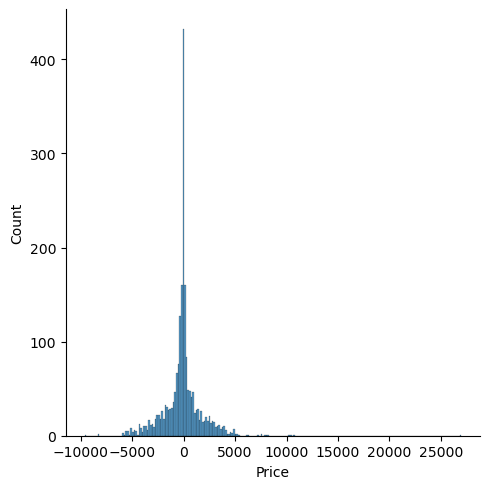

In [254]:
new_y = algo(RandomForestRegressor())

In [255]:
from sklearn.ensemble import RandomForestClassifier

Training score 0.8834406085430077
[ 9968. 10657.  4878. ... 13377.  5380.  4282.]
r2-score: 0.5771405961913408
MSE: 7782805.385119326
MAE: 1510.9246607393543


array([ 9968., 10657.,  4878., ..., 13377.,  5380.,  4282.])

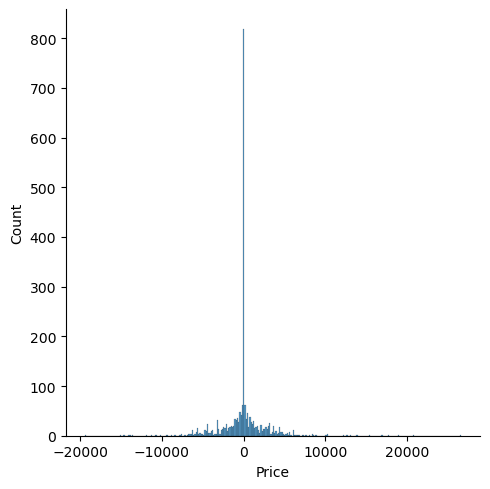

In [256]:
algo(RandomForestClassifier())

In [257]:
pd.DataFrame(new_y,columns=['Price'])

,Price
0,10900.920000
1,12340.670000
2,4892.905000
3,12579.061667
4,6260.572000
...,...
2132,16806.020000
2133,11548.131667
2134,11815.997500
2135,6310.000000


In [258]:
new_y = X_train.head(50)[::3]

In [259]:
new_y

,route_1,route_2,route_3,route_4,route_5,Banglore,Chennai,Delhi,Kolkata,Mumbai,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Total_Stops,Journey_date,Journey_month,Arr_hour,Arr_min,Arrival_Time_hour,Arrival_Time_min,Dep_Time_hour,Dep_Time_min,Duration_hr,Duration_min
3883,0,13,29,13,5,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3,6,8,45,8,45,6,0,2,45
8177,3,7,6,13,5,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,27,6,1,30,1,30,17,30,8,0
520,3,20,22,5,5,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,3,3,21,20,21,20,4,55,16,25
8001,2,28,9,3,5,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,6,6,20,25,20,25,8,20,12,5
9575,2,33,3,13,5,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,15,5,10,20,10,20,6,20,4,0
4743,3,7,6,13,5,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,9,5,1,30,1,30,17,30,8,0
6154,0,7,8,13,5,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,21,3,7,40,7,40,20,35,11,5
7237,0,13,29,13,5,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,24,5,1,0,1,0,22,10,2,50
3857,3,7,6,13,5,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,3,3,21,0,21,0,13,55,7,5
8946,2,14,3,13,5,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,12,6,14,25,14,25,17,0,21,25


In [262]:
X_train

,route_1,route_2,route_3,route_4,route_5,Banglore,Chennai,Delhi,Kolkata,Mumbai,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Total_Stops,Journey_date,Journey_month,Arr_hour,Arr_min,Arrival_Time_hour,Arrival_Time_min,Dep_Time_hour,Dep_Time_min,Duration_hr,Duration_min
3883,0,13,29,13,5,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3,6,8,45,8,45,6,0,2,45
8377,2,5,29,13,5,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,18,5,19,50,19,50,17,15,2,35
4641,2,5,29,13,5,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,5,18,5,18,5,15,30,2,35
8177,3,7,6,13,5,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,27,6,1,30,1,30,17,30,8,0
3266,3,10,29,13,5,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,6,6,21,10,21,10,18,5,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10539,2,7,11,3,5,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,9,5,5,35,5,35,16,50,12,45
9228,2,14,7,3,5,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,12,5,1,20,1,20,10,0,15,20
2972,1,19,29,13,5,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,27,6,7,15,7,15,5,45,1,30
7297,3,20,22,5,5,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,9,6,9,25,9,25,9,45,23,40


In [263]:
model = RandomForestRegressor().fit(X_train,y_train)

In [264]:
price = model.predict(new_y)

In [265]:
price

array([ 6394.40833333, 12884.015     ,  8783.63      , 11416.07      ,
        4226.        ,  8005.17      ,  7821.23      ,  3531.74      ,
       16982.74833333, 12433.4425    ,  4085.13416667, 13731.58      ,
        7104.51      ,  3851.42      ,  4921.28      ,  7493.21      ,
       14908.07966667])

In [266]:
X_test

,route_1,route_2,route_3,route_4,route_5,Banglore,Chennai,Delhi,Kolkata,Mumbai,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Total_Stops,Journey_date,Journey_month,Arr_hour,Arr_min,Arrival_Time_hour,Arrival_Time_min,Dep_Time_hour,Dep_Time_min,Duration_hr,Duration_min
10548,3,0,4,5,5,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,1,6,19,15,19,15,16,40,26,35
9276,0,9,8,13,5,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,9,3,22,45,22,45,11,5,11,40
9080,0,13,29,13,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,12,6,19,35,19,35,17,0,2,35
3487,3,32,4,5,5,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,27,5,19,15,19,15,12,20,30,55
3937,0,13,29,13,5,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,24,6,18,10,18,10,15,15,2,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2746,3,21,4,5,5,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,2,18,5,1,30,1,30,15,5,10,25
2913,2,7,3,13,5,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,6,5,4,40,4,40,14,5,14,35
9524,3,7,6,13,5,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,27,6,1,30,1,30,16,0,9,30
6952,2,15,3,13,5,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,9,6,20,30,20,30,15,10,5,20


In [267]:
price

array([ 6394.40833333, 12884.015     ,  8783.63      , 11416.07      ,
        4226.        ,  8005.17      ,  7821.23      ,  3531.74      ,
       16982.74833333, 12433.4425    ,  4085.13416667, 13731.58      ,
        7104.51      ,  3851.42      ,  4921.28      ,  7493.21      ,
       14908.07966667])

In [268]:
new_y['Price']=price

In [269]:
new_y

,route_1,route_2,route_3,route_4,route_5,Banglore,Chennai,Delhi,Kolkata,Mumbai,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Total_Stops,Journey_date,Journey_month,Arr_hour,Arr_min,Arrival_Time_hour,Arrival_Time_min,Dep_Time_hour,Dep_Time_min,Duration_hr,Duration_min,Price
3883,0,13,29,13,5,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3,6,8,45,8,45,6,0,2,45,6394.408333
8177,3,7,6,13,5,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,27,6,1,30,1,30,17,30,8,0,12884.015000
520,3,20,22,5,5,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,3,3,21,20,21,20,4,55,16,25,8783.630000
8001,2,28,9,3,5,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,6,6,20,25,20,25,8,20,12,5,11416.070000
9575,2,33,3,13,5,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,15,5,10,20,10,20,6,20,4,0,4226.000000
4743,3,7,6,13,5,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,9,5,1,30,1,30,17,30,8,0,8005.170000
6154,0,7,8,13,5,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,21,3,7,40,7,40,20,35,11,5,7821.230000
7237,0,13,29,13,5,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,24,5,1,0,1,0,22,10,2,50,3531.740000
3857,3,7,6,13,5,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,3,3,21,0,21,0,13,55,7,5,16982.748333
8946,2,14,3,13,5,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,12,6,14,25,14,25,17,0,21,25,12433.442500


In [270]:
new_x = y_train.head(50)[::3]

In [271]:
new_x

3883     5769.0
8177    13377.0
520      8899.0
8001    11432.0
9575     4226.0
4743     8330.0
6154     7832.0
7237     3419.0
3857    17057.0
8946    12692.0
1748     4174.0
3437    14151.0
8792     5853.0
8173     3850.0
3719     4823.0
1905     7503.0
1677    16289.0
Name: Price, dtype: float64

In [272]:
new_x-price

3883    -625.408333
8177     492.985000
520      115.370000
8001      15.930000
9575       0.000000
4743     324.830000
6154      10.770000
7237    -112.740000
3857      74.251667
8946     258.557500
1748      88.865833
3437     419.420000
8792   -1251.510000
8173      -1.420000
3719     -98.280000
1905       9.790000
1677    1380.920333
Name: Price, dtype: float64

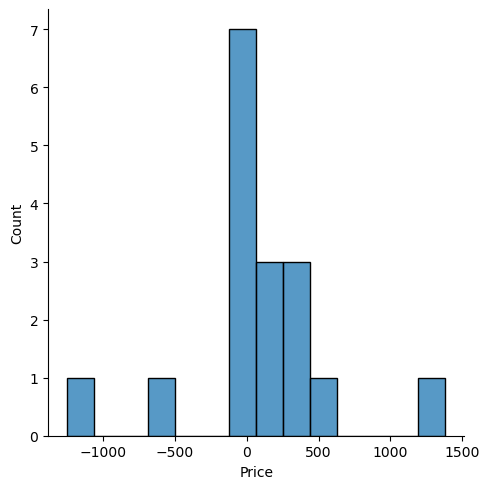

In [273]:
sns.displot(new_x-price)

In [274]:
new_y['old']=new_x

In [275]:
new_y['diff']=new_x-price

In [276]:
pd.options.display.max_rows=500

In [277]:
new_y

,route_1,route_2,route_3,route_4,route_5,Banglore,Chennai,Delhi,Kolkata,Mumbai,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,...,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Total_Stops,Journey_date,Journey_month,Arr_hour,Arr_min,Arrival_Time_hour,Arrival_Time_min,Dep_Time_hour,Dep_Time_min,Duration_hr,Duration_min,Price,old,diff
3883,0,13,29,13,5,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,3,6,8,45,8,45,6,0,2,45,6394.408333,5769.0,-625.408333
8177,3,7,6,13,5,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,27,6,1,30,1,30,17,30,8,0,12884.015000,13377.0,492.985000
520,3,20,22,5,5,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,2,3,3,21,20,21,20,4,55,16,25,8783.630000,8899.0,115.370000
8001,2,28,9,3,5,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,2,6,6,20,25,20,25,8,20,12,5,11416.070000,11432.0,15.930000
9575,2,33,3,13,5,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,15,5,10,20,10,20,6,20,4,0,4226.000000,4226.0,0.000000
4743,3,7,6,13,5,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,9,5,1,30,1,30,17,30,8,0,8005.170000,8330.0,324.830000
6154,0,7,8,13,5,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,21,3,7,40,7,40,20,35,11,5,7821.230000,7832.0,10.770000
7237,0,13,29,13,5,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,24,5,1,0,1,0,22,10,2,50,3531.740000,3419.0,-112.740000
3857,3,7,6,13,5,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,3,3,21,0,21,0,13,55,7,5,16982.748333,17057.0,74.251667
8946,2,14,3,13,5,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,12,6,14,25,14,25,17,0,21,25,12433.442500,12692.0,258.557500
